In [15]:
#time series analysis using linear regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
df = pd.read_csv("covid19_timeseries.csv")

In [17]:
df['Dates'] = pd.to_datetime(df['Dates'])

In [18]:
df['Recovered Cases'] = df['Recovered Cases'].fillna(0)

In [19]:
df_grouped = df.groupby('Dates')[['Confirmed Cases', 'Death Cases', 'Recovered Cases']].sum().reset_index()

In [20]:
df_grouped['days'] = (df_grouped['Dates'] - df_grouped['Dates'].min()).dt.days

In [21]:
X = df_grouped[['days']]
y = df_grouped['Confirmed Cases']

In [22]:
model = LinearRegression()

In [23]:
model.fit(X, y)

LinearRegression()

In [24]:
y_pred = model.predict(X)

In [ ]:
mse = mean_squared_error(y, y_pred)  # mean squared error
rmse = np.sqrt(mse)  # root mean squared error
r2 = r2_score(y, y_pred)  # R-squared score

In [27]:
accuracy = r2 * 100

In [28]:
print("Linear Regression RMSE:", rmse)
print("Linear Regression R² Score:", r2)
print(f"Linear Regression Accuracy: {accuracy:.2f}%")

Linear Regression RMSE: 4391531.671655285
Linear Regression R² Score: 0.8899479217301968
Linear Regression Accuracy: 88.99%


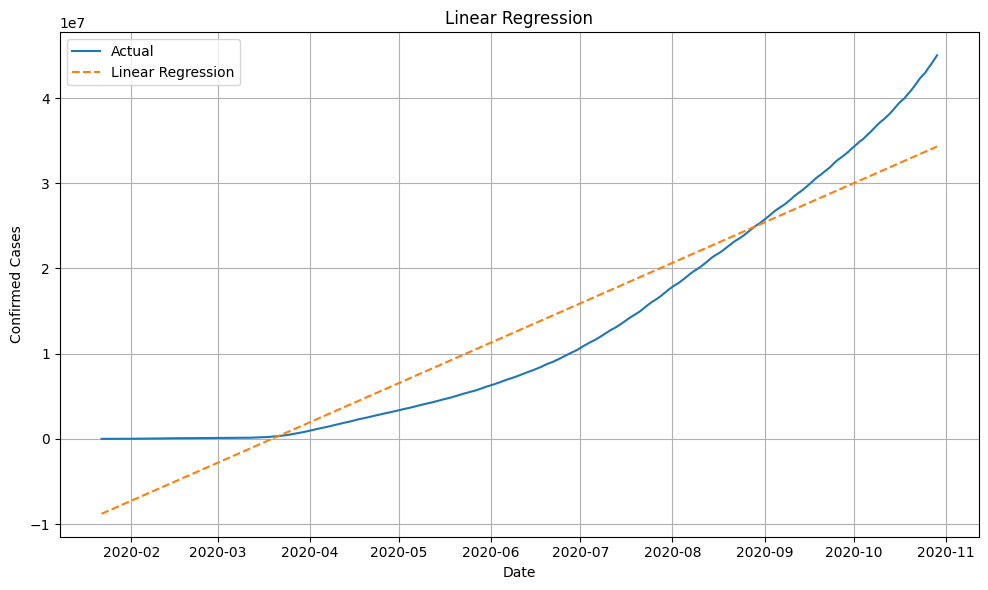

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(df_grouped['Dates'], y, label='Actual')
plt.plot(df_grouped['Dates'], y_pred, label='Linear Regression', linestyle='--')
plt.title('Linear Regression')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()